In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train=x_train/255.0
x_test=x_test/255.0

In [4]:
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

In [5]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [6]:
model = Sequential([
    Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)) , 
    MaxPooling2D(pool_size=(2,2)) , 
    Conv2D(64,kernel_size=(3,3),activation='relu') , 
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])

C:\Users\hello\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.8569 - loss: 0.4949 - val_accuracy: 0.9785 - val_loss: 0.0766
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9814 - loss: 0.0644 - val_accuracy: 0.9887 - val_loss: 0.0431
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9877 - loss: 0.0398 - val_accuracy: 0.9897 - val_loss: 0.0384
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9905 - loss: 0.0307 - val_accuracy: 0.9905 - val_loss: 0.0356
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9924 - loss: 0.0246 - val_accuracy: 0.9915 - val_loss: 0.0317


In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9883 - loss: 0.0344
Test accuracy: 99.00%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


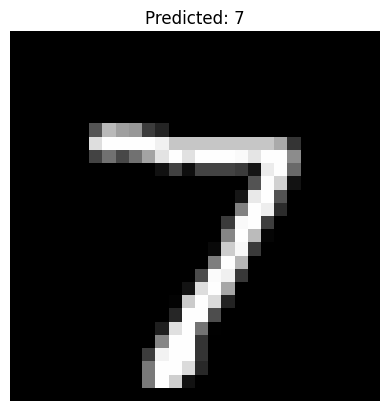

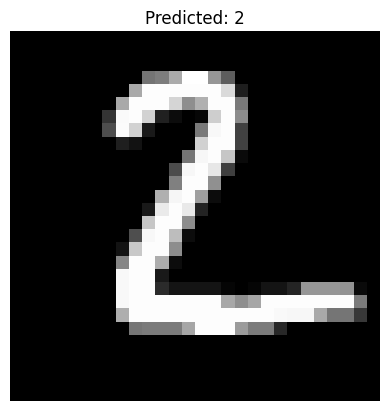

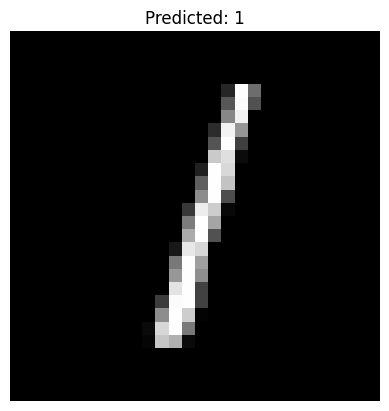

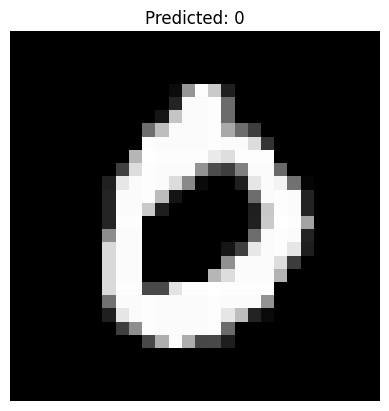

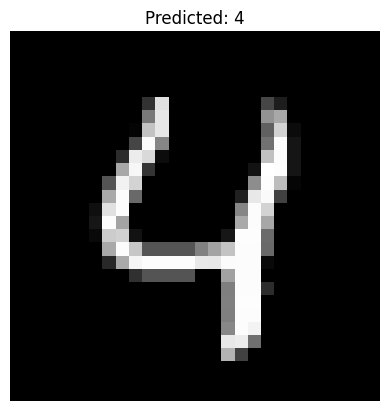

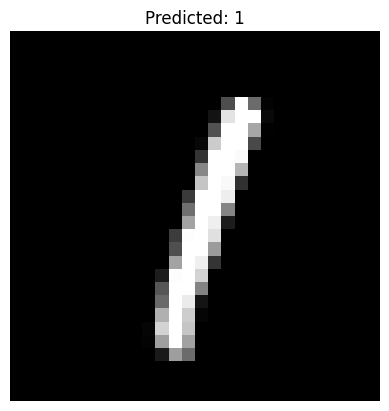

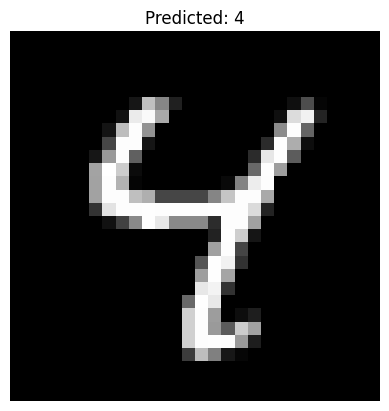

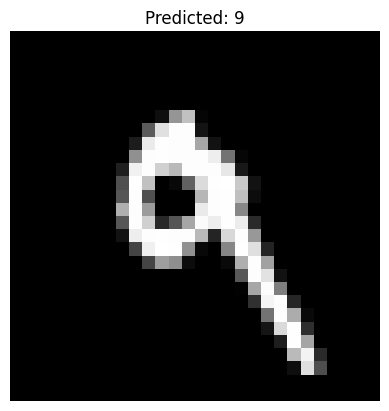

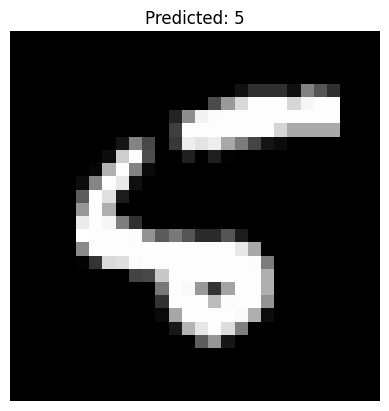

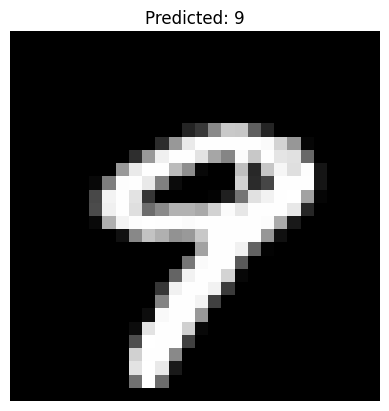

In [10]:
# Predict the first 10 test images
predictions = model.predict(x_test[:10])
for i in range(10):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}")
    plt.axis('off')
    plt.show()
